# Ejercicio

Una empresa de servicios eléctricos desea analizar el consumo eléctrico mensual de los hogares a lo largo de los años. El objetivo
es realizar un gráfico que incluya el promedio histórico, los mínimos y máximos históricos por mes, y realizar una proyección para el año 2025 basada en los promedio históricos. Para determinar la proyección mensual para el año 2025, se debe considerar un aumento del 5% con respecto al promedio mensual histórico respectivo.

Datos de entrada: Archivo CSV llamado `consumo_electrico.csv` con las siguientes columnas:
* Año: Año en el que se registró el consumo.
* Mes: Mes del registro (enero, febrero, etc.).
* Consumo mínimo: Consumo eléctrico mínimo mensual registrado en kWh.
* Consumo máximo: Consumo eléctrico máximo mensual registrado en kWh.

Leer los datos del archivo, para calcular el promedio histórico del promedio de los consumos máximos y mínimos, por mes. No se
conoce la cantidad de registros, pero sí se sabe que para cada año existe toda la información de los 12 meses. Además, se debe
realizar l

## Solución

### 0. Paso previo

Si el código se está ejecutando en el entorno VSCode + devcontainer, es necesario ajustar el directorio de trabajo, debido a el software no lo autoconfigura.

In [11]:
import jappy_utils as jutils
jutils.setWD('/notebook-examples')

### 1. Realizar el esquelo de la solución

Antes de comenzar a codificar, se recomienda realizar el esqueleto de la solución, la que debe tener la importación de las librerías a utilizar y funciones que deberán ser implementadas:

In [12]:
import matplotlib.pyplot as plt
from statistics import mean

def leer_datos(nombre_archivo: str) -> tuple:
    pass

def calcular_proyeccion(minimas: dict, maximas: dict) -> tuple:
    pass

def graficar():
    pass

graficar()

Una vez armado el esqueleto, definir las variables de entrada (parámetros) de las funciones, inicializar las variables de salida y realizar el retorno respectivo. Para la función `leer_datos()` el archivo es un parámetro de tipo `str`. Internamente, deberá retornar los años y los meses que efectivamente están en el archivo de datos. Además, deberá retornar los consumos eléctricos mínimos y máximas de cada mes, a lo largo de todos los años disponibles en el archivos. Por lo tanto, un diccionario puede ser útil para almacenar estos valores. Cada una de las variables que se utilizan, se deben inicializar.

In [13]:
def leer_datos(nombre_archivo: str) -> tuple:
    anios = []
    meses = []
    consumos_minimos = {}
    consumos_maximos = {}


    return anios, meses, consumos_minimos, consumos_maximos

La función `calcular_proyeccion()`, utilizará los diccionarios de consumos eléctricos mínimos y máximos. Además, retornará los promedios históricos de consumos por mes y la proyección respectiva. Para estos estos, se utilizarán listas. Cada una de las variables que se utilizan, se deben inicializar.

In [14]:

def calcular_proyeccion(minimos: dict, maximos: dict) -> tuple:
    promedios_historicos = []
    minimos_historicos = []
    maximos_historicos = []
    proyeccion = []

    return(promedios_historicos, minimos_historicos, maximos_historicos, proyeccion)

La función `graficar()` no tiene parámetros de entrada. Internamente utiliza los datos que retornan las funciones anteriores. Dado lo anterior, se recomienda implementar un código preliminar para tener una idea de como estructurar la lógica de la función. Por ejemplo, la función `leer_datos()`, a partir del archivo `csv`, generará sus cuatro salidas definidas anteriormente. En forma similar, la función `calcular_proyeccion()` retornará dos listas.

In [15]:
def graficar():
    anios, meses, minimos, maximos = leer_datos("consumo_electrico.csv")
    promedios_historicos, minimos_historicos, maximos_historicos, proyeccion = calcular_proyeccion(minimos, maximos)
    
    plt.figure(figsize=(12, 8))
    
    plt.show()

### 2. Implementar funcion `leer_datos()`

La implementación de esta función consiste en leer un archivo. Luego, debe tener la estructura clásica para abrir un archivo:

><pre>
>try:
>    # abrir el archivo
>except:
>    # mostrar error si hay algún problema
>else:
>    # si no hay problema, leer el archivo, hacer la 
>    # lógica de la función y cerrarlo.
></pre>

En la lógica de la función, primero de deben guardar los años y meses que están en el archivo `csv`. En base a los meses obtenidos, se deben inicializar los diccionarios de mínimas y máximas. Se debe recordar que cada clave es el nombre del mes y el valor es una lista de consumos eléctricos. Por eso, cada valor del diccionario se debe inicializar como una lista vacía.

In [16]:
def leer_datos(nombre_archivo: str) -> tuple:
    anios = []
    meses = []
    consumos_minimos = {}
    consumos_maximos = {}

    try:
        mi_archivo = open(nombre_archivo, "r")
    except:
        print(f"El archivo {nombre_archivo} no se puede abir.")
    else:
        # Si no hay problema para abrir el archivo.
        # se leean todas las líneas de él.
        lineas = mi_archivo.readlines()

        # Se cierra el archivo. El contenido
        # está almacenado en la variable lineas
        mi_archivo.close()

        # Completar primero los años y los meses
        for linea in lineas[1:]:
            anio, mes, minimo, maximo = linea.strip().split(",")

            if anio not in anios:
                anios.append(anio)
            if mes not in meses:
                meses.append(mes)
        
        
        # Luego, inicializar los diccionarios
        # cada valor se iniciliza como una lista vacía
        for mes in meses:
            consumos_minimos[mes] = []
            consumos_maximos[mes] = []
        
        # Después, leer nuevamente el archivo, para 
        # guardar los datos de las minimas y maximas
        for linea in lineas[1:]:
            anio, mes, minimo, maximo = linea.strip().split(",")
            consumos_minimos[mes].append(int(minimo))
            consumos_maximos[mes].append(int(maximo))
        

    
    return anios, meses, consumos_minimos, consumos_maximos

### 3. Implementar funcion `calcular_proyeccion()`

Para realizar la proyección, se deben utilizar los diccionarios de consumos mínimos y máximos. Primero, el promedio historico de un mes se calcula promediando todas los consumos (mínimos y máximos) de ese mes. Es número se agrega a la lista de promedios históricos (`promedios_historicos`). A partir de ese promedio, se determina la proyección para el mes respectivo como un aumento del 5%.

In [17]:
def calcular_proyeccion(minimos: dict, maximos: dict) -> tuple:
    promedios_historicos = []
    minimos_historicos = []
    maximos_historicos = []
    proyeccion = []
    

    for mes in minimos:
        promedio_mes = mean(minimos[mes] + maximos[mes])
        promedios_historicos.append(promedio_mes)
        minimos_historicos.append(min(minimos[mes]))
        maximos_historicos.append(max(maximos[mes]))

        proy = promedio_mes * 1.05

        proyeccion.append(proy)
        
    return(promedios_historicos, minimos_historicos, maximos_historicos, proyeccion)

### 3. Implementar funcion `graficar()`

In [18]:
def graficar():
    anios, meses, minimos, maximos = leer_datos("consumo_electrico.csv")
    promedios_historicos, minimos_historicos, maximos_historicos, proyeccion = calcular_proyeccion(minimos, maximos)
    
    plt.figure(figsize=(12, 8))
    plt.plot(meses, promedios_historicos, label="Promedio histórico por mes", marker='o', linestyle='-.', linewidth=2)
    plt.plot(meses, minimos_historicos, label="Mínimos histórico por mes", marker='o', linestyle='-.', linewidth=2)
    plt.plot(meses, maximos_historicos, label="Máximos histórico por mes", marker='o', linestyle='-.', linewidth=2)
    plt.plot(meses, proyeccion, label="Proyección 2025", marker='o', linestyle='--', linewidth=2)
    
    for i in range(len(meses)):
        plt.text(i, promedios_historicos[i] + 0.1, str(round(promedios_historicos[i],2)), ha='center', fontsize=8)
        plt.text(i, proyeccion[i] + 0.1, str(round(proyeccion[i],2)), ha='center', fontsize=8)
    
    plt.title(f"Temperatura desde {min(anios)} hasta {max(anios)}")
    plt.xlabel("Mes")
    plt.ylabel("Temperatura (°C)")
    plt.legend()
    plt.grid(True)
    
    plt.show()

### 4. Ejecutar todo

Para ejecutar todo, sólo es necesario llamar a la función  `graficar()`.

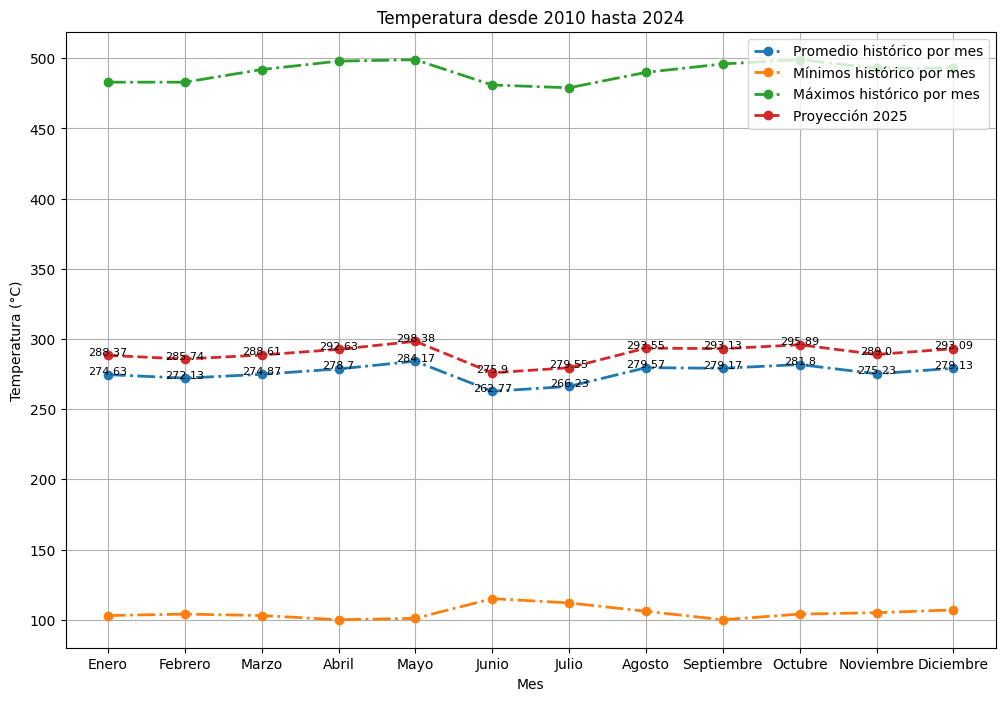

In [19]:
graficar()